# Uvoz tabel

In [38]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import requests

## Uvoz tehtnice

In [39]:
# getting csv files from the folder MyProject
path = "./data/"

# Get CSV files list from a folder
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, header=None) for file in csv_files)

# Concatenate all DataFrames
panji_vsi   = pd.concat(df_list, ignore_index=True)

panj_en_dan = pd.read_csv(r'./data/Hive_1.csv', header=None)
panj_en_dan.columns =['meritev', 'teza']

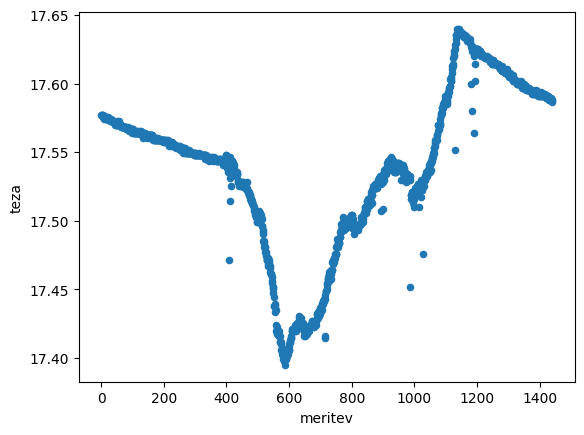

In [40]:
panj_en_dan.plot(kind = 'scatter', x = "meritev", y = "teza")

plt.show()

## Uvoz vremena

#### En dan (direktno parsanje s spleta)

In [42]:
url = 'https://www.si-vreme.com/si/slovenija/vreme/avtomatske-postaje?xs=si-avt_vremenski_podatki&xt=2&ts=0&tl1=LJUBL-ANA_BEZIGRAD_&tl2=LJUBL-ANA_BRNIK_&gm=0&gh=3&go=1&gg=2&gv=9&gd=tml&gc=_vlaznost_smer-vetra_hitrost-v_sunki-v_tlak_padavine_sonce_tempTal005_tempTal010_tempTal020_tempTal030_tempTal050&gu=1&gp=4&fo=0#vsebina'
html = requests.get(url).content
df_list = pd.read_html(html)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,kraj 1,št.,kraj,temp. zraka [°C],vlaga [%],smer vetra [°],hitrost vetra [Km/h],sunki vetra [Km/h],tlak [hPa],padavine [mm],sonce [W/m2],temp. tal 5cm [°C],temp. tal 10cm [°C],temp. tal 20cm [°C],temp. tal 30cm [°C],temp. tal 50cm [°C],kraj 2
1,>,1,Babno Polje,23.6,43,-,-,-,-,0.0,-,-,-,-,-,-,<
2,>,2,Bilje Nova Gorica,27.0,39,227,13,19,1014,0.0,214,33.6,33.3,31.2,28.1,25.2,<
3,>,3,Blegoš,16.6,65,-,-,-,-,0.0,-,-,-,-,-,-,<
4,>,4,Bohinjska Češnjica,25.3,46,-,-,-,-,0.0,-,-,-,-,-,-,<


#### Dnevno

Zaenkrat alfa pristop s kopiranjem arso html-ja. V prihodnosti s *selenium* knjižnico

In [43]:
vreme_dnevno = pd.read_csv(r'./data/vreme_teden.txt')

In [45]:
vreme_dnevno.head()

,dan,povp. dnevna T [°C],količina padavin [mm],višina snežne odeje [cm],nevihta,toča,viharni veter
0,2023-06-05,16.2,5.2,0,ne,ne,ne
1,2023-06-06,18.2,20.7,0,ne,ne,ne
2,2023-06-07,19.6,5.2,0,da,ne,ne
3,2023-06-08,17.3,0.0,0,da,da,ne
4,2023-06-09,20.2,15.7,0,da,ne,ne


## Združevanje

## Odstranjevanje čudnih vrednosti (koda še ni testirana)

### Globalno (ogromni oulierji, ki niso vezani nujno na potek npr. mačka skoči na panj, čebelar odmakne panj, ...)

In [1]:
def remove_outliers(data, threshold=3.5):
    # Calculate the median and median absolute deviation (MAD) of the data
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    
    # Calculate the modified Z-scores using the MAD
    modified_z_scores = 0.6745 * (data - median) / mad
    
    # Identify the outliers based on the threshold
    outliers = np.where(np.abs(modified_z_scores) > threshold)
    
    # Remove the outliers from the data
    cleaned_data = np.delete(data, outliers)
    
    return cleaned_data

### Lokalno (male spremembe vrednosti (ki so lahko npr. še vedno blizu meritev, a ne sovpadajo z regresijo) npr. napaka tehtnice ipd.)

In [2]:
from sklearn.neighbors import LocalOutlierFactor

def remove_outliers(data, contamination=0.1):
    # Create an instance of the Local Outlier Factor algorithm
    lof = LocalOutlierFactor(contamination=contamination)
    
    # Fit the data and predict the outlier scores
    outlier_scores = lof.fit_predict(data.reshape(-1, 1))
    
    # Identify the outliers based on the scores
    outliers = np.where(outlier_scores == -1)
    
    # Remove the outliers from the data
    cleaned_data = np.delete(data, outliers)
    
    return cleaned_data